In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
import numpy as np

import camb
from camb import model, initialpower
import pandas as pd

In [2]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location(
    "spectra", "../shared/spectra.py")
spectra = importlib.util.module_from_spec(spec)
sys.modules["spectra"] = spectra
spec.loader.exec_module(spectra)

In [3]:
omega_index = 1 # while we debug, we confine our attention to just one value
onh2 = spectra.omega_nu[omega_index]
onh2_str = spectra.omnu_strings[omega_index]

In [4]:
k_massless_list, z_massless_list, p_massless_list, s12_massless_list, \
    k_massive_list, z_massive_list, p_massive_list, s12_massive_list = \
    spectra.boltzmann_battery(onh2, skips=[8])

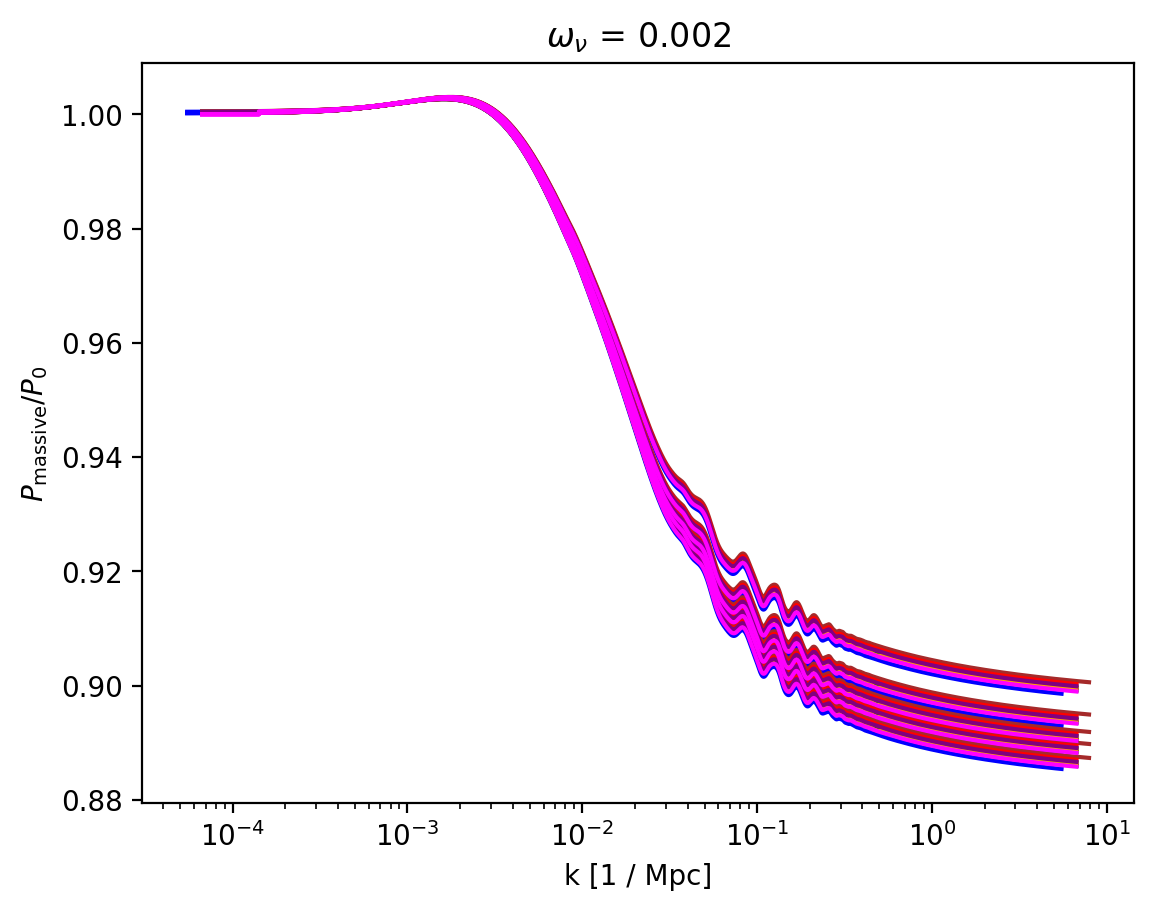

In [5]:
for i in range(len(k_massive_list)):
    h = spectra.cosm.loc[i]["h"]
    for j in range(5):
        plt.plot(k_massless_list[i] * h,
                 p_massive_list[i][j] / p_massless_list[i][j],
                 label="model " + str(i) + ", no renormalizing, z=" + \
                 str(spectra.parse_redshifts(i)[j]), c=spectra.colors[i],
                 linestyle=spectra.styles[i])
    plt.xscale('log')
    plt.xlabel(r"k [1 / Mpc]")
    plt.ylabel(r"$P_\mathrm{massive} / P_0$")
    plt.title(r"$\omega_\nu$ = " + str(onh2))

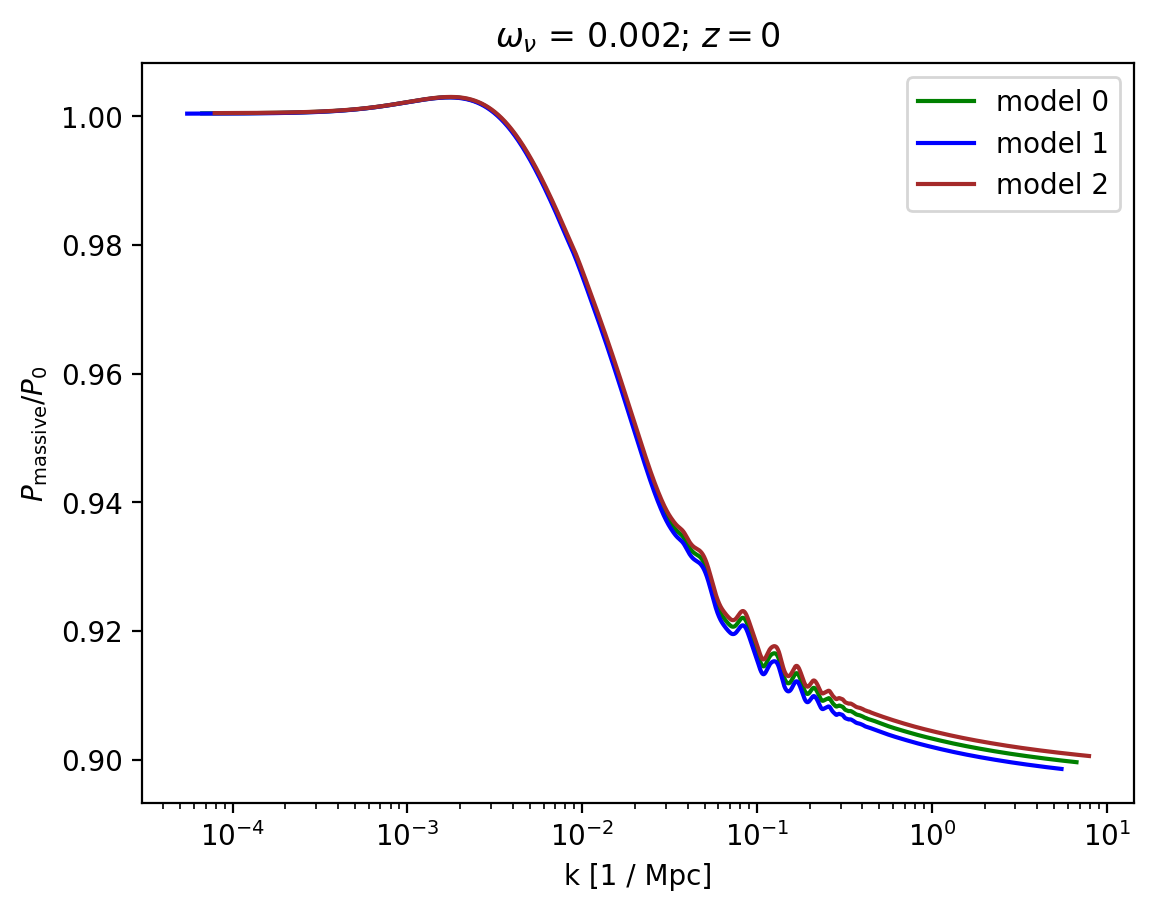

In [6]:
for i in range(0, 3):
    h = spectra.cosm.loc[i]["h"]
    j = 4 # just look at z=0 before moving on
    plt.plot(k_massless_list[i] * h,
             p_massive_list[i][j] / p_massless_list[i][j],
                 label="model " + str(i), c=spectra.colors[i])
    plt.xscale('log')
    plt.xlabel(r"k [1 / Mpc]")
    plt.ylabel(r"$P_\mathrm{massive} / P_0$")
    plt.title(r"$\omega_\nu$ = " + str(onh2) + "; $z=0$")
    plt.legend()

Currently I am not re-normalizing the amplitude of one model based on its counterpart. At least, I *think* I'm not doing that, but I'm really quite unsure

In [7]:
baseline = spectra.powernu[onh2_str][0][0]
baseline_max = spectra.powernu[onh2_str][0][4] # why is this "max"?

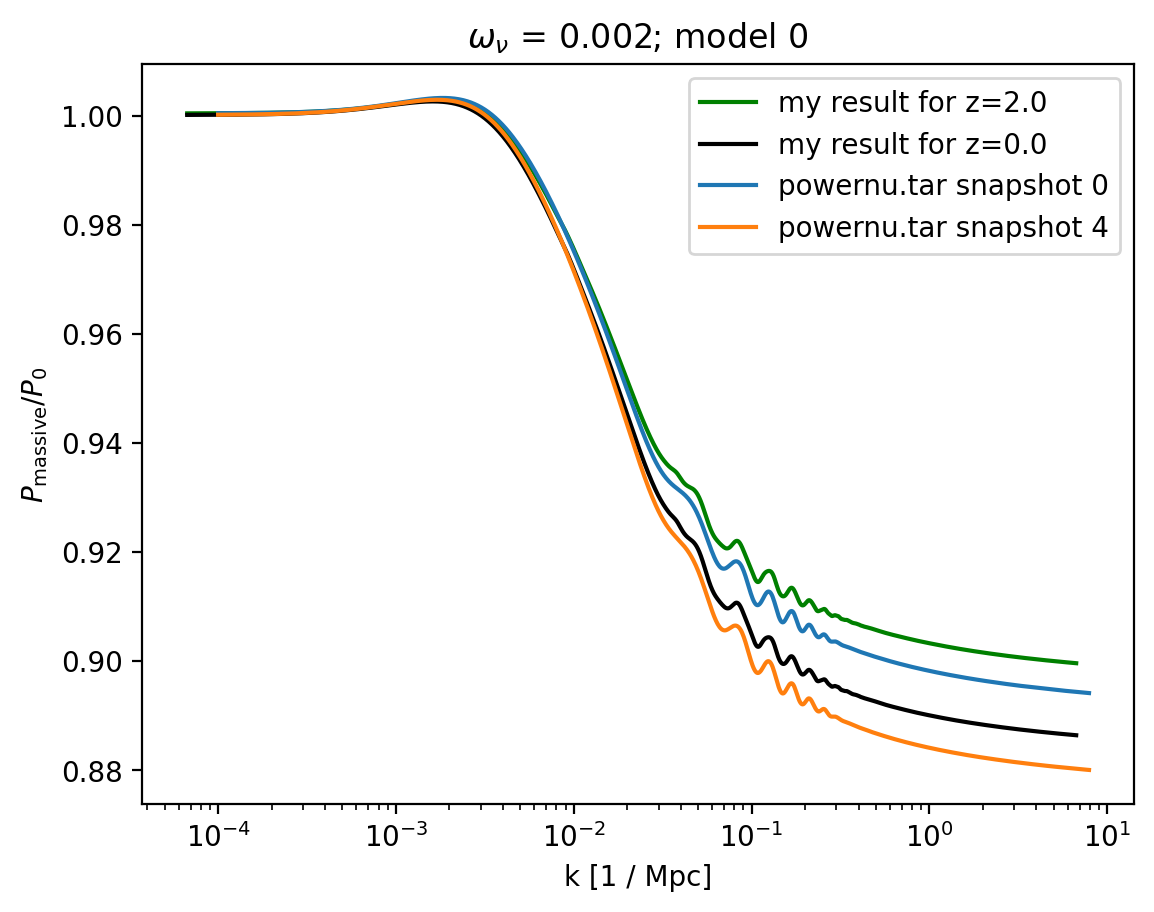

In [8]:
# Let's just look at model 0 for the initial comparisons
i = 0
# Let's just look at redshift 0 for the initial comparisons
j = 4

h = spectra.cosm.loc[i]["h"]
plt.plot(k_massless_list[i] * h, p_massive_list[i][j] / p_massless_list[i][j],
             label="my result for z=" + str(z_massive_list[i][j]),
             c=spectra.colors[i])
j = 0 # This will correspond to z=2 for the model0 case.
plt.plot(k_massless_list[i] * h, p_massive_list[i][j] / p_massless_list[i][j],
             label="my result for z="  + str(z_massive_list[i][j]), c="black")
plt.plot(baseline["k"], baseline["ratio"], label="powernu.tar snapshot 0")
plt.plot(baseline_max["k"], baseline_max["ratio"],
         label="powernu.tar snapshot 4")
plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"$P_\mathrm{massive} / P_0$")
plt.title(r"$\omega_\nu$ = " + str(onh2) + "; model 0")
plt.legend()

We've now made absolutely certain that my lines here should overlap with Ariel's. What went wrong?

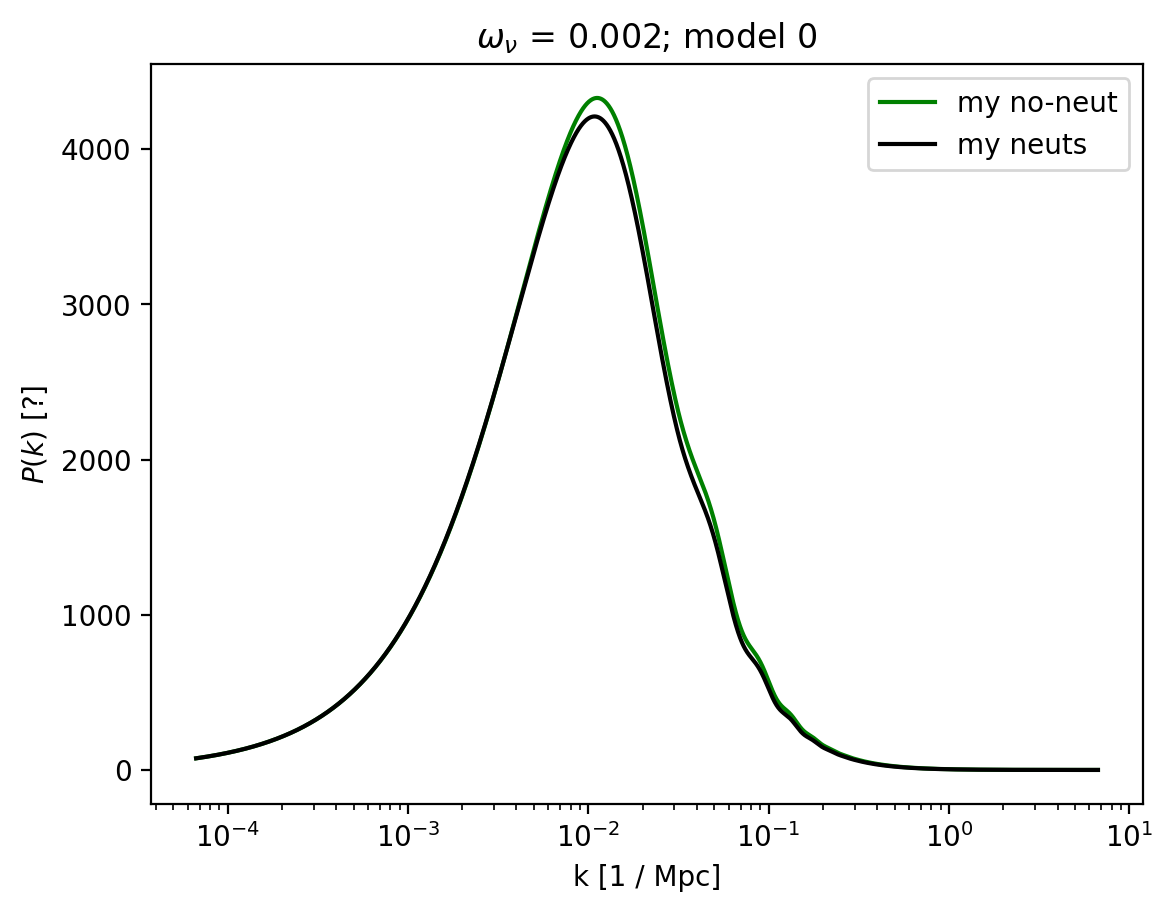

In [9]:
h = spectra.cosm.loc[i]["h"]
j = 4
plt.plot(k_massless_list[i] * h, p_massless_list[i][j],
             label="my no-neut", c=spectra.colors[i])
plt.plot(k_massless_list[i] * h, p_massive_list[i][j],
             label="my neuts", c="black")
plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"$P(k)$ [?]")
plt.title(r"$\omega_\nu$ = " + str(onh2) + "; model 0")
plt.legend()